The algorithm is unstable if $ b_j - a_j\times F_{j-1}$ is zero


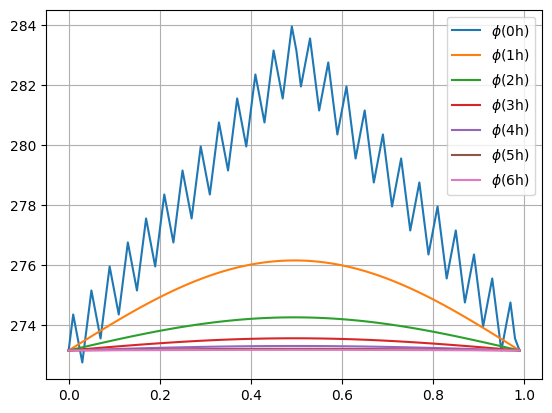

In [33]:
import numpy as np
import matplotlib.pyplot as plt

def funcDiff(x):
    """Function"""
    if x > .5:
        return 273.15 + 20 - 20*x + np.sin(50*np.pi*x)
    else:
        return 273.15 + 20*x + np.sin(50*np.pi*x)

def tridiagonal(a,b,c,d):
    """
    Tridiagonal matrix algorithm
    a, b, c are matrices for tridiagonal
    d is rhs matrix
    """
    n = len(d)
    c1 = np.zeros(n-1)
    d1 = np.zeros(n)
    c1[0] = c[0]/b[0]
    d1[0] = d[0]/b[0]
    for i in range(1, n-1):
        c1[i] = c[i]/(b[i]-a[i]*c1[i-1])
    for i in range(1, n):
        d1[i] = (d[i] - a[i]*d1[i-1])/(b[i] - a[i]*c1[i-1])
    for i in reversed(range(n-1)):
        d1[i] = d1[i] - c1[i]*d1[i+1]
    return d1

def diffusion(x0, y0, k, dt, dx, tinterval, duration, dboundary):
    # create matrix for Thomas algorithm
    alpha = k*dt/dx**2
    sz = len(x0); t = 0
    n = sz - 2
    a = np.ones(n)  *(-alpha)
    b = np.ones(n)  *(1 + 2*alpha)
    c = np.ones(n-1)*(-alpha)
    d = y0[1:sz-1].copy()

    # evolution
    while t < duration:
        d[0] = d[0] + alpha*dboundary
        d[n-1] = d[n-1] + alpha*dboundary
        d = tridiagonal(a,b,c,d)
        if t%tinterval < dt:
            plt.plot(x0, y0, label="$\phi$(" + str(int(np.floor(t/3600))) + "h)")
        y0[1:sz-1] = d[:].copy()
        t = t + dt
    plt.legend()
    plt.grid()

# initial condition
dt = 360; k = 2.9e-5; dx = 0.01
dboundary = 273.15 # dirichlet boundary
x0 = np.arange(0, 1, dx)
y0 = np.vectorize(funcDiff)(x0)
sz = len(x0); y0[0] = dboundary; y0[sz-1] = dboundary
# plt.plot(x0, y0)

# time adjustment
tinterval = 3600
duration = 3600*6 + 10

# run
diffusion(x0, y0, k, dt, dx, tinterval, duration, dboundary)
